In [1]:
# !pip install wordcloud nltk gensim contractions scikit-learn seaborn xgboost
# ! pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors, Word2Vec
import tensorflow as tf
import gensim.downloader as api
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Conv1D, MaxPooling1D, GRU, Bidirectional, SimpleRNN, Input, Flatten, BatchNormalization, GlobalAveragePooling1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve
from wordcloud import WordCloud
from xgboost import XGBClassifier
from xgboost import plotting
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/461.4 KB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━ 389.1/461.4 KB 11.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 461.4/461.4 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.5 MB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.5/1.5 MB 82.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/26.5 MB ? eta -:--:--
     ━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/26.5 MB 154.8 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━ 10.5/26.5 MB 152.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━ 15.8/26.5 MB 152.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━ 21.1/26.5 MB 153.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 26.5/26.5 MB 154.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 26.5/26.5 MB 1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 198.9/200.3 MB 151.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 200.3/200.3 MB 148.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 200.3/200.3 MB 148.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 200.3/200.3 MB 148.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 200.3/200.3 MB 148.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 200.3/200.3 MB 148.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 200.3/200.3 MB 148.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 200.3/200.3 MB 148.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 200.3/200.3 MB 148.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 200.3/200.3 MB 148.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 200.3/200.3 MB 148.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 200.3/200.3 MB 148.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 200.3/200.3 MB 148.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 200.3/200.3 MB 148.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 200.3/200.3 MB 148.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 200.3/200.3 MB 148.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 200.3/200.3 MB 148.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/771.9 KB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.9/771.9 KB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/56.8 KB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/104.5 KB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/289.

D0516 06:38:44.630426129      13 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0516 06:38:44.630452707      13 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0516 06:38:44.630456370      13 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0516 06:38:44.630459746      13 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0516 06:38:44.630462317      13 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0516 06:38:44.630464918      13 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0516 06:38:44.630467415      13 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0516 06:38:44.

In [2]:
!mkdir output

# Reading Cleaned Dataset

In [4]:
df = pd.read_csv('/kaggle/input/traindata/Dataset/Cleaned_train.csv')
# df = pd.read_csv('/kaggle/input/ds-train/ds/Normalized_ds(1).csv')

In [5]:
df[df.label==1].head()

Unnamed: 0                id   
6            6  0002bcb3da6cb337  \
12          12  0005c987bdfc9d4b   
16          16  0007e25b2121310b   
42          42  001810bf8c45bf5f   
43          43  00190820581d90ce   

                                         comment_text  label   
6        COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1  \
12  Hey... what is it..\n@ | talk .\nWhat is it......      1   
16  Bye! \n\nDon't look, come or think of comming ...      1   
42  You are gay or antisemmitian? \n\nArchangel WH...      1   
43           FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!      1   

                                      normalized_text  
6                                cocksucker piss work  
12  hey talk exclusive group wp talibanswho good d...  
16                   bye look come think comme tosser  
42  gay antisemmitian archangel white tiger meow g...  
43                         fuck filthy mother ass dry

In [6]:
df.columns
df.drop(['Unnamed: 0'], inplace=True, axis=1)

In [7]:
df_neg = df[df.label==1]
df_pos = df[df.label==0]
df_pos = df_pos.sample(n=3*len(df_neg))
print(df_pos.shape)
df = pd.concat([df_pos, df_neg], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

(48675, 4)


In [8]:
df[df.label==1].head(100000)

id                                       comment_text   
0      360d7f14273d9d81  "ha ha ha im really getting a kick out of all ...  \
1      70606bd13b58dd4e                           See \n\nYou soon, loser.   
3      9c4d2f3ba8acb30d  Stop deleting my jont.  I told you! You can as...   
7      37c951a9f2fc4b4a  Need to protect the Internet for Wikipiedia an...   
8      b1b431be0561b55d  Listen up. \n\nOK, listen up you god damn jerk...   
...                 ...                                                ...   
64888  df220f663fb813c7  Do you even READ your sources? You couldn't co...   
64891  a21a7d2273ee917f  If you are having trouble with reality, then d...   
64894  937c25263bf86e70  And go ahead and delete my account, I can't wa...   
64895  d866e0fcda8a5f7c  Yes, Mr Fat was a stupidly drunken attempt at ...   
64899  c9b0eba0f9d55fbc  P.S Im a fucking cunt rag and enjoy the taste ...   

       label                                    normalized_text  
0          1  ha ha ha get kick guy angry love take bad fant...  
1          1                                         soon loser  
3          1  stop delete jont tell ask tell friend go presc...  
7          1  need protect internet wikipiedia bad admin rip...  
8          1  listen ok listen god damn jerk sick tired shit...  
...      ...                                                ...  
64888      1  read source come racist post sort nonsense act...  
64891      1  have trouble reality bother post aaaawwww widd...  
64894      1  ahead delete account wait sick have check reta...  
64895      1  yes mr fat stupidly drunken attempt create new...  
64899      1  ps fucking cunt rag enjoy taste nice warm pile...  

[16225 rows x 4 columns]

In [9]:
from collections import Counter
print(Counter(df['label'].values))
df.dropna(inplace=True)

Counter({0: 48675, 1: 16225})


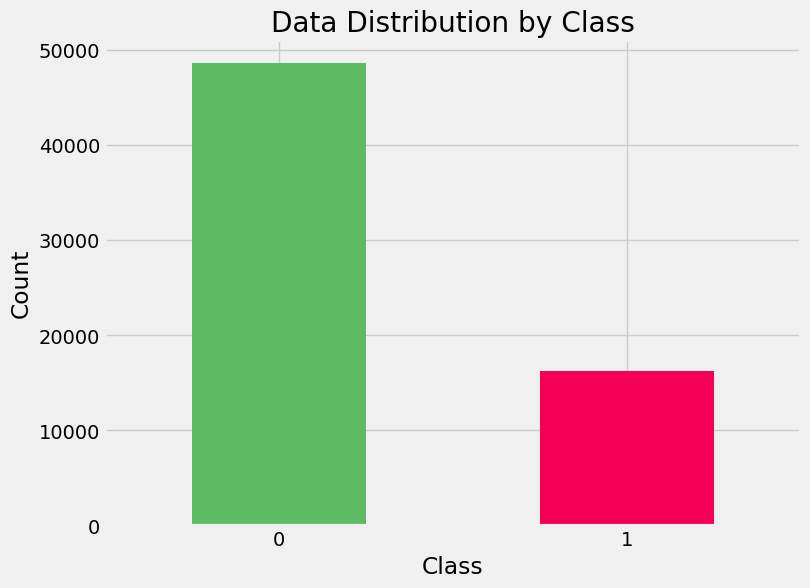

In [10]:
class_counts = df['label'].value_counts()
# Visualize the data distribution
# Custom colors
colors = ["#5dbb63", "#F50057"]  # Purple and pink

# Dark mode style
plt.style.use("fivethirtyeight")

# Visualize the data distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind="bar", color=colors)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Data Distribution by Class")
plt.xticks(rotation=0)
plt.savefig('data_dist_byclass.png')
plt.show()

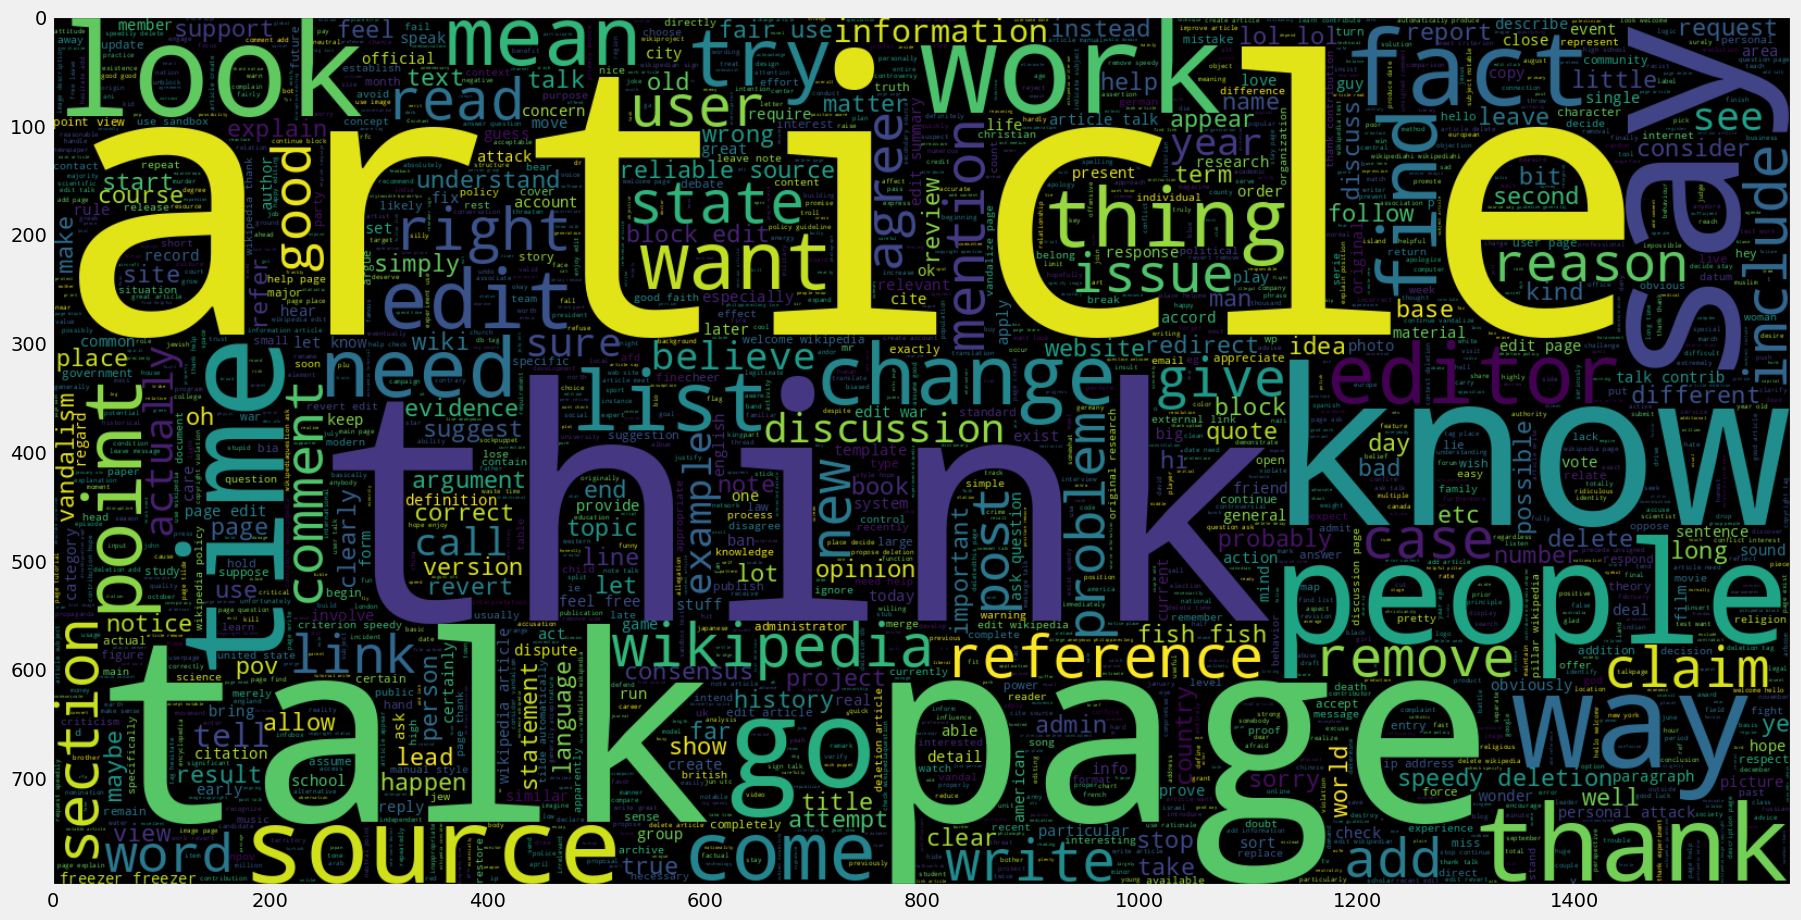

In [11]:
data = df

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.label == 0].normalized_text))
plt.imshow(wc , interpolation = 'bilinear')
plt.grid(None)
plt.savefig('Positive_words.png')

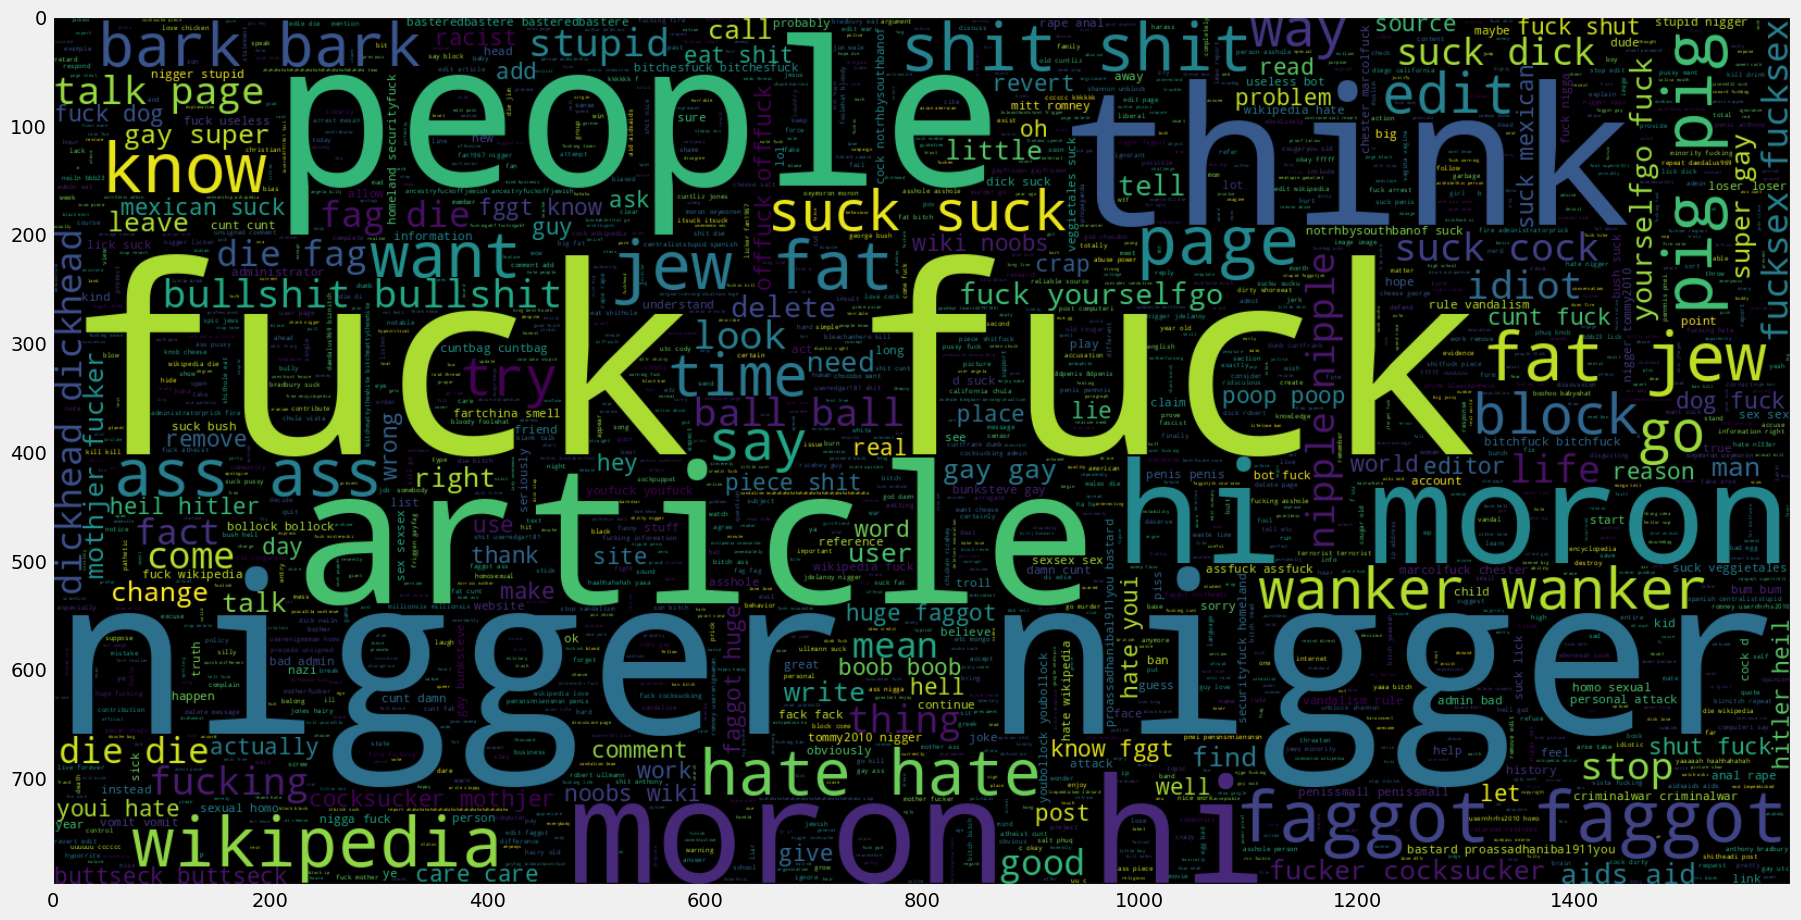

In [12]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.label == 1].normalized_text))
plt.imshow(wc , interpolation = 'bilinear')
plt.grid(None)
plt.savefig('Negative_words.png')

In [13]:
df.shape

(64869, 4)

In [14]:
words = df.normalized_text.values.tolist()
# words = df.cleaned_text.values.tolist()

In [15]:
print(type(words))
# words

<class 'list'>


# Global Variables

In [16]:
CORES = 8
EMBEDDING_DIMS = 300
MAX_LENGTH=300
BATCH_SIZE=16*CORES

# Training Word2Vec from scratch

In [17]:
sentences = [text.split() for text in words]

In [18]:
with strategy.scope():
    wv_model = Word2Vec(sentences, vector_size=EMBEDDING_DIMS, window=5, min_count=2, workers=CORES)

In [19]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['normalized_text'], df['label'], test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42, stratify=df['label'])

In [20]:
# Tokenize and pad text sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1

In [21]:
X_train = pad_sequences(X_train, maxlen=MAX_LENGTH, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=MAX_LENGTH, padding='post', truncating='post')

In [22]:
# Create embedding matrix
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    if word in wv_model.wv:
        embedding_matrix[i] = wv_model.wv[word]

# CNN Model

In [23]:
with strategy.scope():
    # Define CNN model
    inputs = Input(shape=(MAX_LENGTH,))
    embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(inputs)
    conv1 = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)
    pool1 = MaxPooling1D(pool_size=2)(conv1)
    dropout = Dropout(0.5)(pool1)
    conv2 = Conv1D(filters=64, kernel_size=5, activation='relu')(dropout)
    pool2 = MaxPooling1D(pool_size=2)(conv2)
    flatten = Flatten()(pool2)
    dense1 = Dense(128, activation='relu')(flatten)
    dropout = Dropout(0.5)(dense1)
    outputs = Dense(1, activation='sigmoid')(dropout)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

    # Compile and train the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding (Embedding)       (None, 300, 300)          30692700  
                                                                 
 conv1d (Conv1D)             (None, 296, 128)          192128    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 148, 128)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 148, 128)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 144, 64)           41024     
                                                             

In [24]:
# Define callbacks
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
mc = ModelCheckpoint('./output/CNN/CNN_best_weights.h5', save_best_only=True, save_weights_only=True)
tc = tf.keras.callbacks.TensorBoard(log_dir="./output/CNN/logs")
rl = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=BATCH_SIZE, validation_data=(X_test, y_test), callbacks=[es, mc, rl, tc])


Epoch 1/20


2023-05-16 06:40:24.598871: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-05-16 06:40:24.745858: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.



406/406 [==============================] - ETA: 0s - loss: 0.2657 - accuracy: 0.8931

2023-05-16 06:40:34.259810: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-05-16 06:40:34.380708: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.



406/406 [==============================] - 16s 28ms/step - loss: 0.2657 - accuracy: 0.8931 - val_loss: 0.2214 - val_accuracy: 0.9130 - lr: 0.0010
Epoch 2/20

406/406 [==============================] - 6s 14ms/step - loss: 0.2196 - accuracy: 0.9122 - val_loss: 0.2047 - val_accuracy: 0.9171 - lr: 0.0010
Epoch 3/20

150/406 [==========>...................] - ETA: 2s - loss: 0.2145 - accuracy: 0.91


406/406 [==============================] - 6s 14ms/step - loss: 0.2107 - accuracy: 0.9151 - val_loss: 0.2018 - val_accuracy: 0.9198 - lr: 0.0010
Epoch 4/20

309/406 [=====================>........] - ETA: 0s - loss: 0.2039 - accuracy: 0.91


406/406 [==============================] - 5s 13ms/step - loss: 0.2036 - accuracy: 0.9177 - val_loss: 0.2072 - val_accuracy: 0.9176 - lr: 0.0010
Epoch 5/20

406/406 [==============================] - 6s 14ms/step - loss: 0.1969 - accuracy: 0.9196 - val_loss: 0.2071 - val_accuracy: 0.9198 - lr: 0.0010
Epoch 6/20

 49/406 [==>...........................] - ETA: 3s - loss: 0.1785 - accuracy: 0.92


406/406 [==============================] - 6s 14ms/step - loss: 0.1922 - accuracy: 0.9229 - val_loss: 0.2000 - val_accuracy: 0.9188 - lr: 0.0010
Epoch 7/20

201/406 [=============>................] - ETA: 1s - loss: 0.1789 - accuracy: 0.92


406/406 [==============================] - 6s 14ms/step - loss: 0.1844 - accuracy: 0.9242 - val_loss: 0.1963 - val_accuracy: 0.9211 - lr: 0.0010
Epoch 8/20

352/406 [=========================>....] - ETA: 0s - loss: 0.1816 - accuracy: 0.92


406/406 [==============================] - 6s 14ms/step - loss: 0.1831 - accuracy: 0.9255 - val_loss: 0.1979 - val_accuracy: 0.9223 - lr: 0.0010
Epoch 9/20

406/406 [==============================] - 5s 13ms/step - loss: 0.1790 - accuracy: 0.9272 - val_loss: 0.1988 - val_accuracy: 0.9222 - lr: 0.0010
Epoch 10/20

 59/406 [===>..........................] - ETA: 3s - loss: 0.1716 - accuracy: 0.92


406/406 [==============================] - 5s 13ms/step - loss: 0.1734 - accuracy: 0.9281 - val_loss: 0.1984 - val_accuracy: 0.9215 - lr: 0.0010
Epoch 11/20

209/406 [==============>...............] - ETA: 1s - loss: 0.1586 - accuracy: 0.93


406/406 [==============================] - 6s 14ms/step - loss: 0.1604 - accuracy: 0.9335 - val_loss: 0.1928 - val_accuracy: 0.9232 - lr: 1.0000e-04
Epoch 12/20

362/406 [=========================>....] - ETA: 0s - loss: 0.1539 - accuracy: 0.93


406/406 [==============================] - 6s 14ms/step - loss: 0.1539 - accuracy: 0.9362 - val_loss: 0.1920 - val_accuracy: 0.9240 - lr: 1.0000e-04
Epoch 13/20

406/406 [==============================] - 5s 13ms/step - loss: 0.1482 - accuracy: 0.9378 - val_loss: 0.1923 - val_accuracy: 0.9238 - lr: 1.0000e-04
Epoch 14/20

 97/406 [======>.......................] - ETA: 2s - loss: 0.1495 - accuracy: 0.93


406/406 [==============================] - 5s 13ms/step - loss: 0.1484 - accuracy: 0.9376 - val_loss: 0.1934 - val_accuracy: 0.9220 - lr: 1.0000e-04
Epoch 15/20

255/406 [=================>............] - ETA: 1s - loss: 0.1467 - accuracy: 0.93


406/406 [==============================] - 5s 13ms/step - loss: 0.1457 - accuracy: 0.9390 - val_loss: 0.1927 - val_accuracy: 0.9238 - lr: 1.0000e-04
Epoch 16/20

406/406 [==============================] - 5s 13ms/step - loss: 0.1426 - accuracy: 0.9403 - val_loss: 0.1935 - val_accuracy: 0.9234 - lr: 1.0000e-05


Epoch 17/20

406/406 [==============================] - 8s 20ms/step - loss: 0.1412 - accuracy: 0.9404 - val_loss: 0.1933 - val_accuracy: 0.9241 - lr: 1.0000e-05


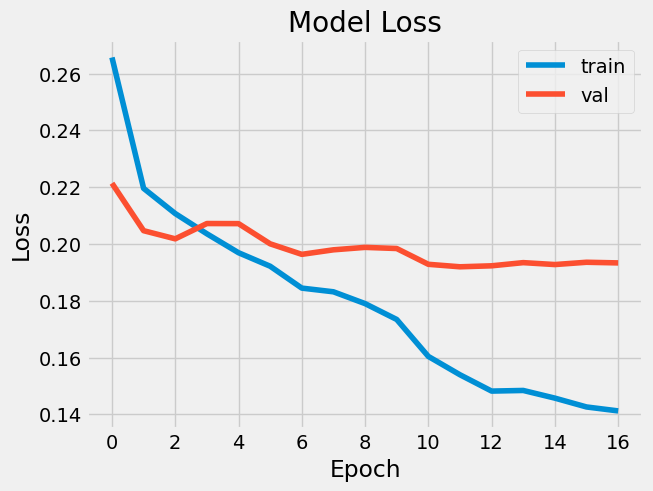

In [25]:
# Plot the training and validation loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.savefig('./output/CNN/CNN_LOSS.png')
plt.show()

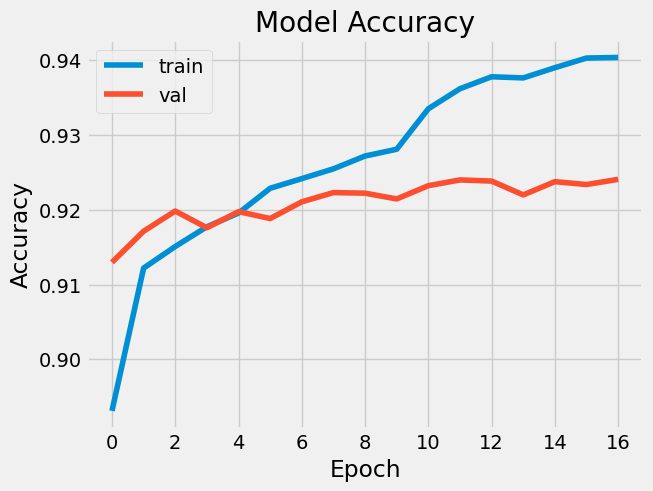

In [26]:
# Plot the training and validation accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('./output/CNN/CNN_ACCURACY.png')
plt.show()

In [27]:
# Load the best weights
model.load_weights('/kaggle/working/output/CNN/CNN_best_weights.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.19195035099983215
Test Accuracy: 0.9240018725395203


In [28]:
# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate the F1 score and AUC score
f1 = f1_score(y_test, y_pred.round())
auc = roc_auc_score(y_test, y_pred)
print('F1 Score:', f1)
print('AUC Score:', auc)

2023-05-16 06:42:21.178373: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-05-16 06:42:21.260042: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.



406/406 [==============================] - 6s 10ms/step
F1 Score: 0.8410702772404901
AUC Score: 0.9670500233045469


In [29]:
y_pred_binary = y_pred.round()

# Generate the classification report
report = classification_report(y_test, y_pred_binary)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      9714
           1       0.89      0.80      0.84      3260

    accuracy                           0.92     12974
   macro avg       0.91      0.88      0.90     12974
weighted avg       0.92      0.92      0.92     12974



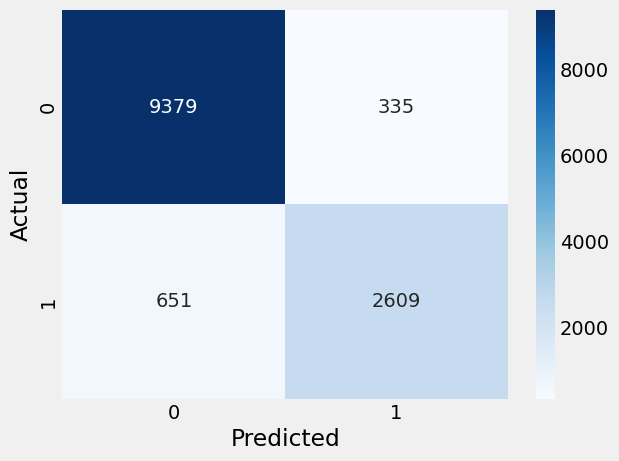

In [30]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('./output/CNN/CNN_ConfusionMatrix.png')
plt.show()

In [31]:
# model.save('CNN_MODEL.h5')

In [32]:
models=[]
# accuracy = accuracy_score(y_pred, y_test)
cnn = {'Model': 'CNN', 'Accuracy': accuracy, 'F1-score':f1, 'AUC-Score': auc}
models.append(cnn)
models

[{'Model': 'CNN',
  'Accuracy': 0.9240018725395203,
  'F1-score': 0.8410702772404901,
  'AUC-Score': 0.9670500233045469}]

In [33]:
import shutil


# Bi-LSTM

In [34]:
# Define the model
with strategy.scope():

    inputs = Input(shape=(MAX_LENGTH,))
    embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(inputs)
    lstm = Bidirectional(LSTM(256, return_sequences=True))(embedding_layer)
    lstm = Dropout(0.5)(lstm)

    # Add another LSTM layer
    lstm = Bidirectional(LSTM(128))(lstm)
    lstm = Dropout(0.5)(lstm)

    # Add a dense layer
    dense = Dense(64, activation='relu')(lstm)
    dense = Dropout(0.3)(dense)

    # Define the output layer
    outputs = Dense(1, activation='sigmoid')(dense)

    # Create the model
    model1 = Model(inputs=inputs, outputs=outputs)

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 300, 300)          30692700  
                                                                 
 bidirectional (Bidirectiona  (None, 300, 512)         1140736   
 l)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 300, 512)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              656384    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 256)               0   

In [35]:
# Define callbacks
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
mc = ModelCheckpoint('./output/BILSTM/BiLSTM_best_weights.h5', save_best_only=True, save_weights_only=True)
tc = tf.keras.callbacks.TensorBoard(log_dir="./output/BILSTM/logs")
rl = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)

# Train the model
model1.fit(X_train, y_train, epochs=20, batch_size=BATCH_SIZE, validation_data=(X_test, y_test), callbacks=[es, mc, rl, tc])


Epoch 1/20


2023-05-16 06:42:45.467599: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-05-16 06:42:45.820787: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.



 96/406 [======>.......................] - ETA: 48s - loss: 0.2946 - accuracy: 0.882


192/406 [=============>................] - ETA: 33s - loss: 0.2626 - accuracy: 0.897


288/406 [====================>.........] - ETA: 18s - loss: 0.2465 - accuracy: 0.902


385/406 [===========================>..] - ETA: 3s - loss: 0.2373 - accuracy: 0.90


406/406 [==============================] - ETA: 0s - loss: 0.2365 - accuracy: 0.9070

2023-05-16 06:44:03.672522: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-05-16 06:44:03.866378: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.



406/406 [==============================] - 93s 192ms/step - loss: 0.2365 - accuracy: 0.9070 - val_loss: 0.2070 - val_accuracy: 0.9241 - lr: 0.0010
Epoch 2/20

 94/406 [=====>........................] - ETA: 49s - loss: 0.1951 - accuracy: 0.923


190/406 [=============>................] - ETA: 33s - loss: 0.1972 - accuracy: 0.922


286/406 [====================>.........] - ETA: 18s - loss: 0.1970 - accuracy: 0.923


383/406 [===========================>..] - ETA: 3s - loss: 0.1965 - accuracy: 0.92


406/406 [==============================] - 67s 165ms/step - loss: 0.1975 - accuracy: 0.9230 - val_loss: 0.1973 - val_accuracy: 0.9158 - lr: 0.0010
Epoch 3/20

 72/406 [====>.........................] - ETA: 52s - loss: 0.1859 - accuracy: 0.926


168/406 [===========>..................] - ETA: 37s - loss: 0.1841 - accuracy: 0.926


264/406 [==================>...........] - ETA: 22s - loss: 0.1822 - accuracy: 0.928


360/406 [=========================>....] - ETA: 7s - loss: 0.1852 - accuracy: 0.92


406/406 [==============================] - 67s 165ms/step - loss: 0.1849 - accuracy: 0.9267 - val_loss: 0.1804 - val_accuracy: 0.9315 - lr: 0.0010
Epoch 4/20

 49/406 [==>...........................] - ETA: 55s - loss: 0.1791 - accuracy: 0.928


145/406 [=========>....................] - ETA: 40s - loss: 0.1812 - accuracy: 0.926


241/406 [================>.............] - ETA: 25s - loss: 0.1777 - accuracy: 0.928


337/406 [=======================>......] - ETA: 10s - loss: 0.1770 - accuracy: 0.929


406/406 [==============================] - 67s 165ms/step - loss: 0.1766 - accuracy: 0.9293 - val_loss: 0.1731 - val_accuracy: 0.9293 - lr: 0.0010
Epoch 5/20

 27/406 [>.............................] - ETA: 59s - loss: 0.1789 - accuracy: 0.929


123/406 [========>.....................] - ETA: 44s - loss: 0.1703 - accuracy: 0.932


219/406 [===============>..............] - ETA: 29s - loss: 0.1670 - accuracy: 0.933


315/406 [======================>.......] - ETA: 14s - loss: 0.1668 - accuracy: 0.933


406/406 [==============================] - 67s 165ms/step - loss: 0.1681 - accuracy: 0.9330 - val_loss: 0.1709 - val_accuracy: 0.9329 - lr: 0.0010
Epoch 6/20

  5/406 [..............................] - ETA: 1:01 - loss: 0.1527 - accuracy: 0.94


101/406 [======>.......................] - ETA: 47s - loss: 0.1551 - accuracy: 0.936


197/406 [=============>................] - ETA: 32s - loss: 0.1579 - accuracy: 0.936


293/406 [====================>.........] - ETA: 17s - loss: 0.1591 - accuracy: 0.935


390/406 [===========================>..] - ETA: 2s - loss: 0.1607 - accuracy: 0.93


406/406 [==============================] - 66s 164ms/step - loss: 0.1608 - accuracy: 0.9352 - val_loss: 0.1721 - val_accuracy: 0.9350 - lr: 0.0010
Epoch 7/20

 78/406 [====>.........................] - ETA: 51s - loss: 0.1450 - accuracy: 0.940


174/406 [===========>..................] - ETA: 36s - loss: 0.1521 - accuracy: 0.938


270/406 [==================>...........] - ETA: 21s - loss: 0.1533 - accuracy: 0.937


366/406 [==========================>...] - ETA: 6s - loss: 0.1528 - accuracy: 0.93


406/406 [==============================] - 66s 164ms/step - loss: 0.1535 - accuracy: 0.9384 - val_loss: 0.1797 - val_accuracy: 0.9306 - lr: 0.0010
Epoch 8/20

 55/406 [===>..........................] - ETA: 54s - loss: 0.1437 - accuracy: 0.938


151/406 [==========>...................] - ETA: 39s - loss: 0.1353 - accuracy: 0.943


247/406 [=================>............] - ETA: 24s - loss: 0.1344 - accuracy: 0.943


343/406 [========================>.....] - ETA: 9s - loss: 0.1327 - accuracy: 0.94


406/406 [==============================] - 66s 164ms/step - loss: 0.1308 - accuracy: 0.9465 - val_loss: 0.1809 - val_accuracy: 0.9335 - lr: 1.0000e-04
Epoch 9/20

 32/406 [=>............................] - ETA: 58s - loss: 0.1133 - accuracy: 0.948


128/406 [========>.....................] - ETA: 43s - loss: 0.1229 - accuracy: 0.949


224/406 [===============>..............] - ETA: 28s - loss: 0.1232 - accuracy: 0.949


320/406 [======================>.......] - ETA: 13s - loss: 0.1209 - accuracy: 0.950


406/406 [==============================] - 66s 164ms/step - loss: 0.1212 - accuracy: 0.9508 - val_loss: 0.1832 - val_accuracy: 0.9338 - lr: 1.0000e-04
Epoch 10/20

  9/406 [..............................] - ETA: 1:01 - loss: 0.0946 - accuracy: 0.95


105/406 [======>.......................] - ETA: 46s - loss: 0.1120 - accuracy: 0.953


201/406 [=============>................] - ETA: 31s - loss: 0.1147 - accuracy: 0.952


297/406 [====================>.........] - ETA: 16s - loss: 0.1117 - accuracy: 0.954


394/406 [============================>.] - ETA: 1s - loss: 0.1138 - accuracy: 0.95


406/406 [==============================] - 69s 171ms/step - loss: 0.1139 - accuracy: 0.9542 - val_loss: 0.1885 - val_accuracy: 0.9336 - lr: 1.0000e-05


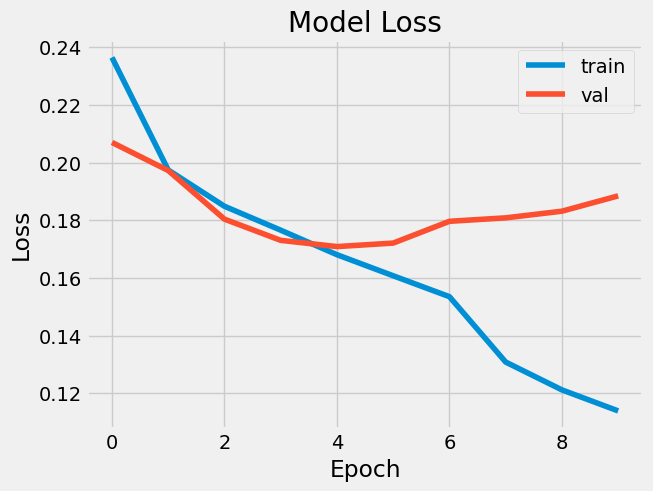

In [36]:
# Plot the training and validation loss
plt.plot(model1.history.history['loss'])
plt.plot(model1.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.savefig('./output/BILSTM/BiLSTM_LOSS.png')
plt.show()

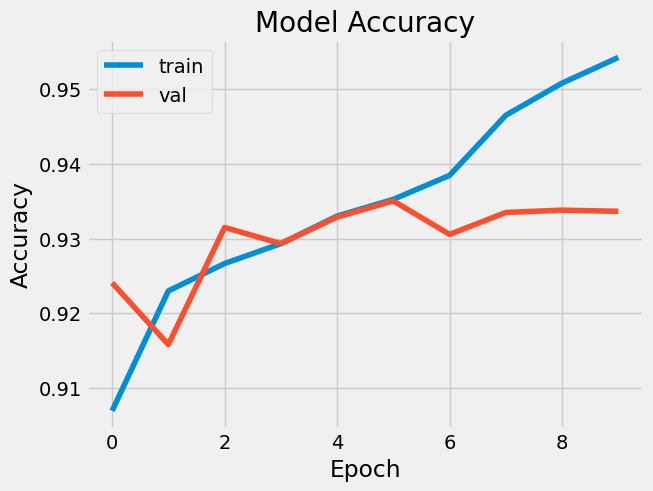

In [37]:
# Plot the training and validation accuracy
plt.plot(model1.history.history['accuracy'])
plt.plot(model1.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('./output/BILSTM/BiLSTM_ACCURACY.png')
plt.show()

In [38]:
# Load the best weights
# model1.load_weights('/output/BILSTM/BiLSTM_best_weights.h5')
model1.load_weights('/kaggle/working/output/BILSTM/BiLSTM_best_weights.h5')
# Evaluate the model on the test set
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.17090600728988647
Test Accuracy: 0.9328657388687134


In [39]:
# Predict the labels for the test set
y_pred = model1.predict(X_test)

# Calculate the F1 score and AUC score
f1 = f1_score(y_test, y_pred.round())
auc = roc_auc_score(y_test, y_pred)
print('F1 Score:', f1)
print('AUC Score:', auc)

2023-05-16 06:54:36.939827: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-05-16 06:54:37.118030: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.



389/406 [===========================>..] - ETA: 


406/406 [==============================] - 15s 28ms/step
F1 Score: 0.8613719560719402
AUC Score: 0.9741597258273744


              precision    recall  f1-score   support

           0       0.94      0.97      0.96      9714
           1       0.90      0.83      0.86      3260

    accuracy                           0.93     12974
   macro avg       0.92      0.90      0.91     12974
weighted avg       0.93      0.93      0.93     12974



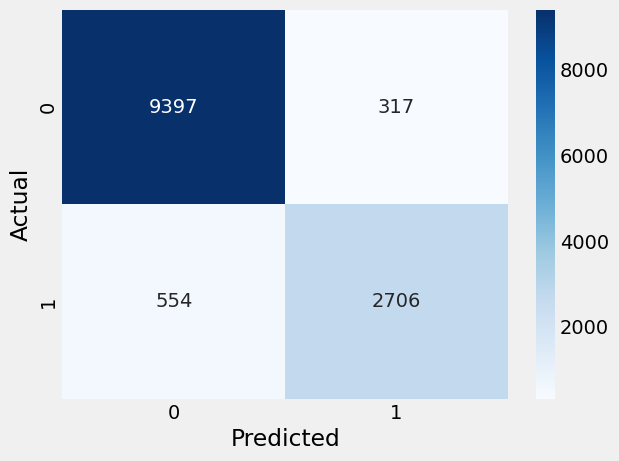

In [40]:
y_pred_binary = y_pred.round()

# Generate the classification report
report = classification_report(y_test, y_pred_binary)
print(report)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('./output/BILSTM/BiLSTM_ConfusionMatrix.png')
plt.show()

In [41]:
# shutil.make_archive('BILSTM', 'zip', '/kaggle/working/output/BILSTM')

In [42]:
# bilstm = {}
bilstm = {'Model': 'Bi-LSTM', 'Accuracy': accuracy, 'F1-score':f1, 'AUC-Score': auc}
models.append(bilstm)
# models = models[:1]

In [43]:
models

[{'Model': 'CNN',
  'Accuracy': 0.9240018725395203,
  'F1-score': 0.8410702772404901,
  'AUC-Score': 0.9670500233045469},
 {'Model': 'Bi-LSTM',
  'Accuracy': 0.9328657388687134,
  'F1-score': 0.8613719560719402,
  'AUC-Score': 0.9741597258273744}]

# GRU

In [44]:
with strategy.scope():
    inputs = Input(shape=(MAX_LENGTH,))
    embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(inputs)
    gru1 = GRU(units=256, return_sequences=True)(embedding_layer)
    gru2 = GRU(units=64)(gru1)
    dense1 = Dense(128, activation='relu')(gru2)
    dropout = Dropout(0.5)(dense1)
    outputs = Dense(1, activation='sigmoid')(dropout)
    model2 = Model(inputs=inputs, outputs=outputs)
        # Compile the model
    model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 300, 300)          30692700  
                                                                 
 gru (GRU)                   (None, 300, 256)          428544    
                                                                 
 gru_1 (GRU)                 (None, 64)                61824     
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129 

In [45]:
# Define callbacks
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
mc = ModelCheckpoint('./output/GRU/GRU_best_weights.h5', save_best_only=True, save_weights_only=True)
tc = tf.keras.callbacks.TensorBoard(log_dir="./output/GRU/logs")
rl = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)

# Train the model
model2.fit(X_train, y_train, epochs=10, batch_size=BATCH_SIZE, validation_data=(X_test, y_test), callbacks=[es, mc, rl, tc])


Epoch 1/10


2023-05-16 06:55:08.989938: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-05-16 06:55:09.213679: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.



 96/406 [======>.......................] - ETA: 18s - loss: 0.5803 - accuracy: 0.745


192/406 [=============>................] - ETA: 13s - loss: 0.5755 - accuracy: 0.746


289/406 [====================>.........] - ETA: 7s - loss: 0.5713 - accuracy: 0.74


387/406 [===========================>..] - ETA: 1s - loss: 0.5682 - accuracy: 0.75


406/406 [==============================] - ETA: 0s - loss: 0.5678 - accuracy: 0.7505

2023-05-16 06:55:42.776775: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-05-16 06:55:42.930265: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.



406/406 [==============================] - 44s 85ms/step - loss: 0.5678 - accuracy: 0.7505 - val_loss: 0.5609 - val_accuracy: 0.7504 - lr: 0.0010
Epoch 2/10

 94/406 [=====>........................] - ETA: 19s - loss: 0.5665 - accuracy: 0.747


190/406 [=============>................] - ETA: 13s - loss: 0.5644 - accuracy: 0.750


287/406 [====================>.........] - ETA: 7s - loss: 0.5633 - accuracy: 0.75


385/406 [===========================>..] - ETA: 1s - loss: 0.5618 - accuracy: 0.75


406/406 [==============================] - 27s 67ms/step - loss: 0.5617 - accuracy: 0.7524 - val_loss: 0.5622 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 3/10

 74/406 [====>.........................] - ETA: 20s - loss: 0.5651 - accuracy: 0.748


170/406 [===========>..................] - ETA: 14s - loss: 0.5638 - accuracy: 0.750


266/406 [==================>...........] - ETA: 8s - loss: 0.5617 - accuracy: 0.75


364/406 [=========================>....] - ETA: 2s - loss: 0.5213 - accuracy: 0.76


406/406 [==============================] - 28s 68ms/step - loss: 0.4916 - accuracy: 0.7827 - val_loss: 0.1983 - val_accuracy: 0.9218 - lr: 0.0010
Epoch 4/10

 54/406 [==>...........................] - ETA: 21s - loss: 0.2131 - accuracy: 0.914


150/406 [==========>...................] - ETA: 15s - loss: 0.2028 - accuracy: 0.919


246/406 [=================>............] - ETA: 9s - loss: 0.2001 - accuracy: 0.92


344/406 [========================>.....] - ETA: 3s - loss: 0.2001 - accuracy: 0.92


406/406 [==============================] - 28s 69ms/step - loss: 0.1982 - accuracy: 0.9210 - val_loss: 0.1807 - val_accuracy: 0.9285 - lr: 0.0010
Epoch 5/10

 34/406 [=>............................] - ETA: 23s - loss: 0.1900 - accuracy: 0.925


130/406 [========>.....................] - ETA: 16s - loss: 0.1755 - accuracy: 0.928


226/406 [===============>..............] - ETA: 11s - loss: 0.1781 - accuracy: 0.928


324/406 [======================>.......] - ETA: 5s - loss: 0.1778 - accuracy: 0.92


406/406 [==============================] - 28s 68ms/step - loss: 0.1769 - accuracy: 0.9290 - val_loss: 0.1716 - val_accuracy: 0.9325 - lr: 0.0010
Epoch 6/10

 15/406 [>.............................] - ETA: 24s - loss: 0.1586 - accuracy: 0.934


111/406 [=======>......................] - ETA: 18s - loss: 0.1602 - accuracy: 0.933


207/406 [==============>...............] - ETA: 12s - loss: 0.1611 - accuracy: 0.933


304/406 [=====================>........] - ETA: 6s - loss: 0.1617 - accuracy: 0.93


402/406 [============================>.] - ETA: 0s - loss: 0.1645 - accuracy: 0.93


406/406 [==============================] - 27s 67ms/step - loss: 0.1643 - accuracy: 0.9324 - val_loss: 0.1776 - val_accuracy: 0.9310 - lr: 0.0010
Epoch 7/10

 91/406 [=====>........................] - ETA: 19s - loss: 0.1519 - accuracy: 0.936


187/406 [============>.................] - ETA: 13s - loss: 0.1517 - accuracy: 0.937


284/406 [===================>..........] - ETA: 7s - loss: 0.1495 - accuracy: 0.93


382/406 [===========================>..] - ETA: 1s - loss: 0.1509 - accuracy: 0.93


406/406 [==============================] - 27s 67ms/step - loss: 0.1510 - accuracy: 0.9380 - val_loss: 0.1790 - val_accuracy: 0.9294 - lr: 0.0010
Epoch 8/10

 72/406 [====>.........................] - ETA: 20s - loss: 0.1301 - accuracy: 0.946


168/406 [===========>..................] - ETA: 14s - loss: 0.1271 - accuracy: 0.948


264/406 [==================>...........] - ETA: 8s - loss: 0.1255 - accuracy: 0.94


362/406 [=========================>....] - ETA: 2s - loss: 0.1247 - accuracy: 0.94


406/406 [==============================] - 28s 68ms/step - loss: 0.1245 - accuracy: 0.9490 - val_loss: 0.1804 - val_accuracy: 0.9348 - lr: 1.0000e-04
Epoch 9/10

 52/406 [==>...........................] - ETA: 21s - loss: 0.1130 - accuracy: 0.957


148/406 [=========>....................] - ETA: 15s - loss: 0.1182 - accuracy: 0.952


244/406 [=================>............] - ETA: 9s - loss: 0.1178 - accuracy: 0.95


342/406 [========================>.....] - ETA: 3s - loss: 0.1165 - accuracy: 0.95


406/406 [==============================] - 27s 67ms/step - loss: 0.1160 - accuracy: 0.9531 - val_loss: 0.1903 - val_accuracy: 0.9329 - lr: 1.0000e-04
Epoch 10/10

 32/406 [=>............................] - ETA: 22s - loss: 0.1207 - accuracy: 0.950


128/406 [========>.....................] - ETA: 16s - loss: 0.1125 - accuracy: 0.955


224/406 [===============>..............] - ETA: 11s - loss: 0.1102 - accuracy: 0.956


322/406 [======================>.......] - ETA: 5s - loss: 0.1096 - accuracy: 0.95


406/406 [==============================] - 30s 73ms/step - loss: 0.1091 - accuracy: 0.9557 - val_loss: 0.1887 - val_accuracy: 0.9333 - lr: 1.0000e-05


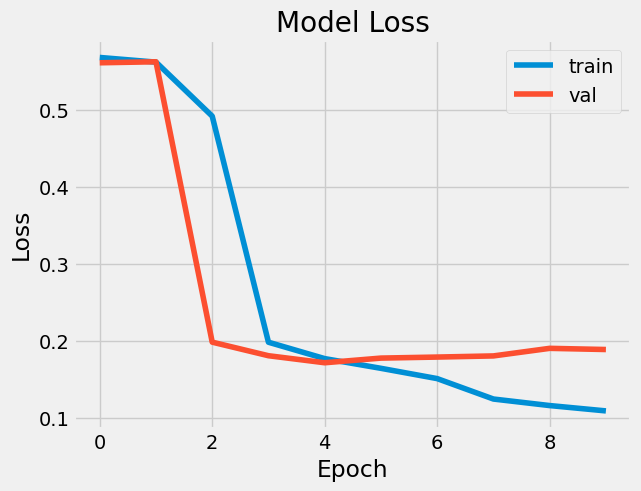

In [46]:
# Plot the training and validation loss
plt.plot(model2.history.history['loss'])
plt.plot(model2.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.savefig('./output/GRU/GRU_LOSS.png')
plt.show()

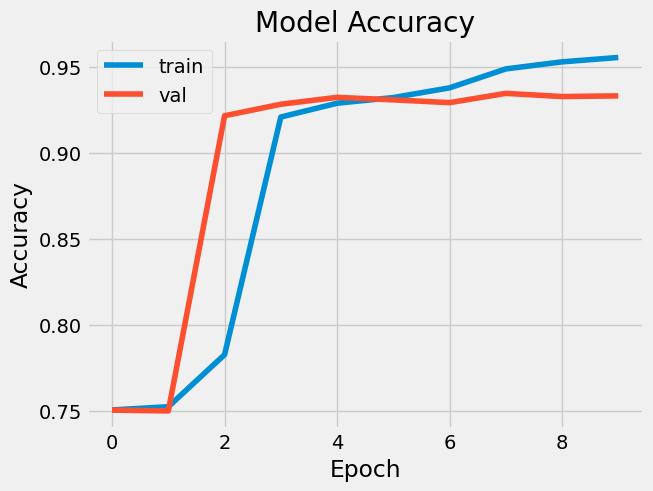

In [47]:
# Plot the training and validation accuracy
plt.plot(model2.history.history['accuracy'])
plt.plot(model2.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('./output/GRU/GRU_ACCURACY.png')
plt.show()

In [48]:
# Load the best weights
model2.load_weights('/kaggle/working/output/GRU/GRU_best_weights.h5')

# Evaluate the model on the test set
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.17157599329948425
Test Accuracy: 0.9324803352355957


In [49]:
# Predict the labels for the test set
y_pred = model2.predict(X_test)

# Calculate the F1 score and AUC score
f1 = f1_score(y_test, y_pred.round())
auc = roc_auc_score(y_test, y_pred)
print('F1 Score:', f1)
print('AUC Score:', auc)

2023-05-16 07:00:18.562455: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-05-16 07:00:18.678884: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.



406/406 [==============================] - 10s 19ms/step
F1 Score: 0.8605539637058262
AUC Score: 0.9746866201586225


              precision    recall  f1-score   support

           0       0.94      0.97      0.96      9714
           1       0.89      0.83      0.86      3260

    accuracy                           0.93     12974
   macro avg       0.92      0.90      0.91     12974
weighted avg       0.93      0.93      0.93     12974



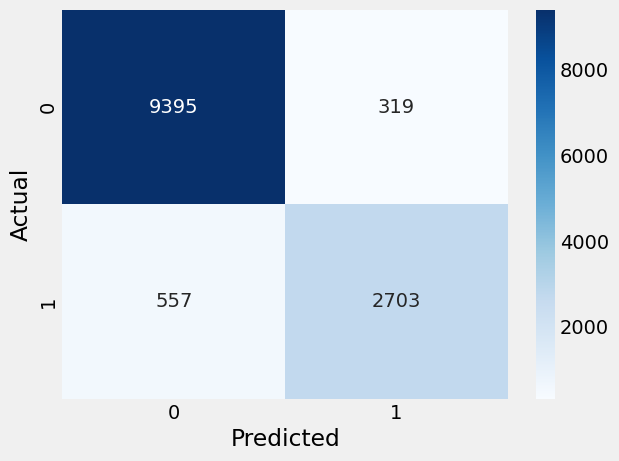

In [50]:
y_pred_binary = y_pred.round()

# Generate the classification report
report = classification_report(y_test, y_pred_binary)
print(report)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('./output/GRU/GRU_ConfusionMatrix.png')
plt.show()

In [51]:
gru = {'Model': 'GRU', 'Accuracy': accuracy, 'F1-score':f1, 'AUC-Score': auc}
models.append(gru)

In [52]:

models

[{'Model': 'CNN',
  'Accuracy': 0.9240018725395203,
  'F1-score': 0.8410702772404901,
  'AUC-Score': 0.9670500233045469},
 {'Model': 'Bi-LSTM',
  'Accuracy': 0.9328657388687134,
  'F1-score': 0.8613719560719402,
  'AUC-Score': 0.9741597258273744},
 {'Model': 'GRU',
  'Accuracy': 0.9324803352355957,
  'F1-score': 0.8605539637058262,
  'AUC-Score': 0.9746866201586225}]

# LSTM

In [53]:
# from tensorflow.keras.regularizers import l2

with strategy.scope():
    inputs = Input(shape=(MAX_LENGTH,))
    embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(inputs)
    lstm = LSTM(256, return_sequences=True)(embedding_layer)
    lstm = Dropout(0.3)(lstm)

    # Add another LSTM layer
    lstm = LSTM(128)(lstm)
    lstm = Dropout(0.3)(lstm)

    # Add a dense layer
    dense = Dense(64, activation='relu')(lstm)
    dense = Dropout(0.3)(dense)

    # Define the output layer
    outputs = Dense(1, activation='sigmoid')(dense)

    # Create the model
    model3 = Model(inputs=inputs, outputs=outputs)

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model3.summary()



Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 300, 300)          30692700  
                                                                 
 lstm_2 (LSTM)               (None, 300, 256)          570368    
                                                                 
 dropout_6 (Dropout)         (None, 300, 256)          0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256

In [54]:

es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
mc = ModelCheckpoint('./output/LSTM/LSTM_best_weights.h5', save_best_only=True, save_weights_only=True)
tc = tf.keras.callbacks.TensorBoard(log_dir="./output/LSTM/logs")
rl = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)

# Train the model
model3.fit(X_train, y_train, epochs=20, batch_size=BATCH_SIZE, validation_data=(X_test, y_test), callbacks=[es, mc, rl, tc])


Epoch 1/20


2023-05-16 07:00:48.907997: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-05-16 07:00:49.149342: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.



 96/406 [======>.......................] - ETA: 19s - loss: 0.5770 - accuracy: 0.748


192/406 [=============>................] - ETA: 13s - loss: 0.5682 - accuracy: 0.753


289/406 [====================>.........] - ETA: 7s - loss: 0.5654 - accuracy: 0.75


387/406 [===========================>..] - ETA: 1s - loss: 0.5674 - accuracy: 0.75


406/406 [==============================] - ETA: 0s - loss: 0.5672 - accuracy: 0.7536

2023-05-16 07:01:22.542849: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-05-16 07:01:22.699371: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.



406/406 [==============================] - 43s 85ms/step - loss: 0.5672 - accuracy: 0.7536 - val_loss: 0.5596 - val_accuracy: 0.7517 - lr: 0.0010
Epoch 2/20

 94/406 [=====>........................] - ETA: 19s - loss: 0.5684 - accuracy: 0.753


190/406 [=============>................] - ETA: 13s - loss: 0.5692 - accuracy: 0.751


287/406 [====================>.........] - ETA: 7s - loss: 0.5693 - accuracy: 0.75


385/406 [===========================>..] - ETA: 1s - loss: 0.5610 - accuracy: 0.75


406/406 [==============================] - 28s 69ms/step - loss: 0.5559 - accuracy: 0.7549 - val_loss: 0.4438 - val_accuracy: 0.7497 - lr: 0.0010
Epoch 3/20

 74/406 [====>.........................] - ETA: 20s - loss: 0.4590 - accuracy: 0.736


170/406 [===========>..................] - ETA: 14s - loss: 0.4475 - accuracy: 0.746


266/406 [==================>...........] - ETA: 8s - loss: 0.4412 - accuracy: 0.75


364/406 [=========================>....] - ETA: 2s - loss: 0.4377 - accuracy: 0.77


406/406 [==============================] - 28s 70ms/step - loss: 0.4352 - accuracy: 0.7787 - val_loss: 0.4190 - val_accuracy: 0.8341 - lr: 0.0010
Epoch 4/20

 53/406 [==>...........................] - ETA: 22s - loss: 0.4333 - accuracy: 0.823


149/406 [==========>...................] - ETA: 16s - loss: 0.4197 - accuracy: 0.825


245/406 [=================>............] - ETA: 10s - loss: 0.3928 - accuracy: 0.848


343/406 [========================>.....] - ETA: 3s - loss: 0.3747 - accuracy: 0.86


406/406 [==============================] - 28s 69ms/step - loss: 0.3643 - accuracy: 0.8688 - val_loss: 0.2852 - val_accuracy: 0.9144 - lr: 0.0010
Epoch 5/20

 33/406 [=>............................] - ETA: 23s - loss: 0.3169 - accuracy: 0.902


129/406 [========>.....................] - ETA: 17s - loss: 0.2943 - accuracy: 0.905


225/406 [===============>..............] - ETA: 11s - loss: 0.2754 - accuracy: 0.908


323/406 [======================>.......] - ETA: 5s - loss: 0.2728 - accuracy: 0.91


406/406 [==============================] - 28s 69ms/step - loss: 0.2683 - accuracy: 0.9129 - val_loss: 0.2222 - val_accuracy: 0.9261 - lr: 0.0010
Epoch 6/20

 13/406 [..............................] - ETA: 24s - loss: 0.2178 - accuracy: 0.929


109/406 [=======>......................] - ETA: 18s - loss: 0.2279 - accuracy: 0.924


205/406 [==============>...............] - ETA: 12s - loss: 0.2259 - accuracy: 0.923


302/406 [=====================>........] - ETA: 6s - loss: 0.2292 - accuracy: 0.92


400/406 [============================>.] - ETA: 0s - loss: 0.2287 - accuracy: 0.92


406/406 [==============================] - 28s 70ms/step - loss: 0.2282 - accuracy: 0.9240 - val_loss: 0.2041 - val_accuracy: 0.9268 - lr: 0.0010
Epoch 7/20

 88/406 [=====>........................] - ETA: 19s - loss: 0.2225 - accuracy: 0.923


184/406 [============>.................] - ETA: 13s - loss: 0.2171 - accuracy: 0.927


281/406 [===================>..........] - ETA: 7s - loss: 0.2128 - accuracy: 0.92


379/406 [===========================>..] - ETA: 1s - loss: 0.2158 - accuracy: 0.92


406/406 [==============================] - 28s 68ms/step - loss: 0.2147 - accuracy: 0.9269 - val_loss: 0.2047 - val_accuracy: 0.9286 - lr: 0.0010
Epoch 8/20

 68/406 [====>.........................] - ETA: 21s - loss: 0.1955 - accuracy: 0.932


164/406 [===========>..................] - ETA: 15s - loss: 0.1992 - accuracy: 0.930


260/406 [==================>...........] - ETA: 9s - loss: 0.1990 - accuracy: 0.92


358/406 [=========================>....] - ETA: 3s - loss: 0.1974 - accuracy: 0.92


406/406 [==============================] - 28s 70ms/step - loss: 0.1974 - accuracy: 0.9294 - val_loss: 0.1988 - val_accuracy: 0.9273 - lr: 0.0010
Epoch 9/20

 47/406 [==>...........................] - ETA: 22s - loss: 0.1990 - accuracy: 0.928


143/406 [=========>....................] - ETA: 16s - loss: 0.1875 - accuracy: 0.928


239/406 [================>.............] - ETA: 10s - loss: 0.1876 - accuracy: 0.930


337/406 [=======================>......] - ETA: 4s - loss: 0.1896 - accuracy: 0.92


406/406 [==============================] - 28s 69ms/step - loss: 0.1900 - accuracy: 0.9301 - val_loss: 0.1920 - val_accuracy: 0.9331 - lr: 0.0010
Epoch 10/20

 27/406 [>.............................] - ETA: 23s - loss: 0.1825 - accuracy: 0.930


123/406 [========>.....................] - ETA: 17s - loss: 0.1798 - accuracy: 0.935


219/406 [===============>..............] - ETA: 11s - loss: 0.1847 - accuracy: 0.934


317/406 [======================>.......] - ETA: 5s - loss: 0.1848 - accuracy: 0.93


406/406 [==============================] - 28s 70ms/step - loss: 0.1841 - accuracy: 0.9346 - val_loss: 0.2302 - val_accuracy: 0.9255 - lr: 0.0010
Epoch 11/20

  7/406 [..............................] - ETA: 24s - loss: 0.3056 - accuracy: 0.914


103/406 [======>.......................] - ETA: 19s - loss: 0.2003 - accuracy: 0.932


199/406 [=============>................] - ETA: 12s - loss: 0.1905 - accuracy: 0.932


296/406 [====================>.........] - ETA: 6s - loss: 0.1904 - accuracy: 0.93


394/406 [============================>.] - ETA: 0s - loss: 0.1939 - accuracy: 0.93


406/406 [==============================] - 28s 68ms/step - loss: 0.1945 - accuracy: 0.9330 - val_loss: 0.2103 - val_accuracy: 0.9302 - lr: 0.0010
Epoch 12/20

 82/406 [=====>........................] - ETA: 20s - loss: 0.1839 - accuracy: 0.940


178/406 [============>.................] - ETA: 14s - loss: 0.1859 - accuracy: 0.939


275/406 [===================>..........] - ETA: 8s - loss: 0.1873 - accuracy: 0.93


373/406 [==========================>...] - ETA: 2s - loss: 0.1857 - accuracy: 0.94


406/406 [==============================] - 28s 68ms/step - loss: 0.1867 - accuracy: 0.9401 - val_loss: 0.2099 - val_accuracy: 0.9317 - lr: 1.0000e-04
Epoch 13/20

 62/406 [===>..........................] - ETA: 21s - loss: 0.1745 - accuracy: 0.939


158/406 [==========>...................] - ETA: 15s - loss: 0.1787 - accuracy: 0.941


254/406 [=================>............] - ETA: 9s - loss: 0.1770 - accuracy: 0.94


352/406 [=========================>....] - ETA: 3s - loss: 0.1765 - accuracy: 0.94


406/406 [==============================] - 28s 68ms/step - loss: 0.1776 - accuracy: 0.9418 - val_loss: 0.2152 - val_accuracy: 0.9329 - lr: 1.0000e-04
Epoch 14/20

 42/406 [==>...........................] - ETA: 22s - loss: 0.1777 - accuracy: 0.946


138/406 [=========>....................] - ETA: 16s - loss: 0.1808 - accuracy: 0.942


234/406 [================>.............] - ETA: 10s - loss: 0.1762 - accuracy: 0.943


332/406 [=======================>......] - ETA: 4s - loss: 0.1753 - accuracy: 0.94


406/406 [==============================] - 30s 73ms/step - loss: 0.1761 - accuracy: 0.9433 - val_loss: 0.2135 - val_accuracy: 0.9325 - lr: 1.0000e-05


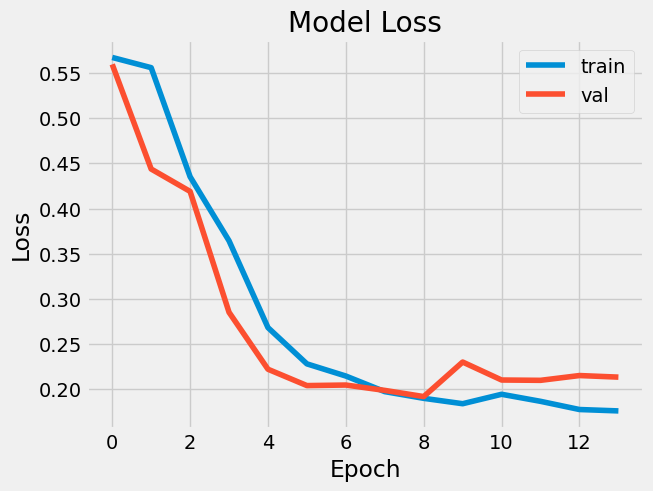

In [55]:
# Plot the training and validation loss
plt.plot(model3.history.history['loss'])
plt.plot(model3.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.savefig('./output/LSTM/LSTM_LOSS.png')
plt.show()

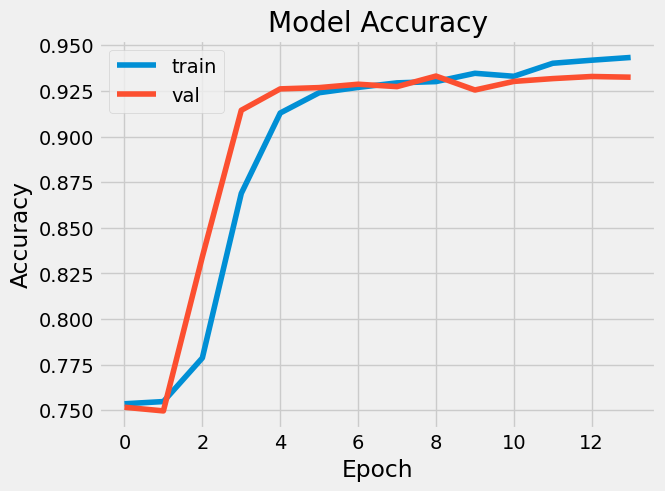

In [56]:
# Plot the training and validation accuracy
plt.plot(model3.history.history['accuracy'])
plt.plot(model3.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('./output/LSTM/LSTM_ACCURACY.png')
plt.show()

In [57]:
# Load the best weights
model3.load_weights('/kaggle/working/output/LSTM/LSTM_best_weights.h5')

# Evaluate the model on the test set
loss, accuracy = model3.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.191972017288208
Test Accuracy: 0.9330969452857971


2023-05-16 07:07:59.904966: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-05-16 07:08:00.035152: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.



406/406 [==============================] - 10s 18ms/step
F1 Score: 0.8608528374479
AUC Score: 0.9511748270474212
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      9714
           1       0.90      0.82      0.86      3260

    accuracy                           0.93     12974
   macro avg       0.92      0.90      0.91     12974
weighted avg       0.93      0.93      0.93     12974



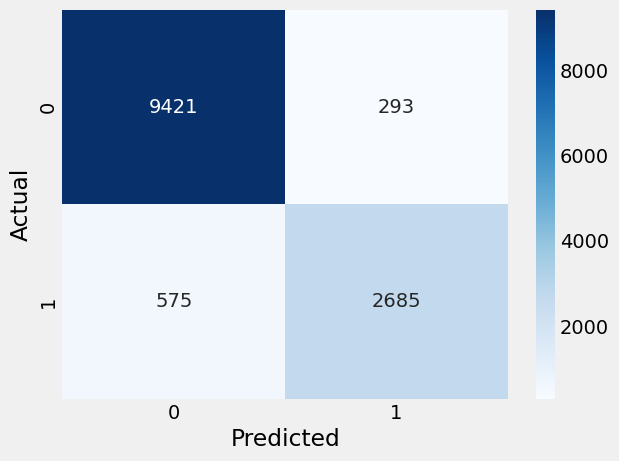

In [58]:
# Predict the labels for the test set
y_pred = model3.predict(X_test)

# Calculate the F1 score and AUC score
f1 = f1_score(y_test, y_pred.round())
auc = roc_auc_score(y_test, y_pred)
print('F1 Score:', f1)
print('AUC Score:', auc)

y_pred_binary = y_pred.round()

# Generate the classification report
report = classification_report(y_test, y_pred_binary)
print(report)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('./output/LSTM/LSTM_ConfusionMatrix.png')
plt.show()

In [59]:
lstm = {'Model': 'LSTM', 'Accuracy': accuracy, 'F1-score':f1, 'AUC-Score': auc}
models.append(lstm)

In [60]:
models

[{'Model': 'CNN',
  'Accuracy': 0.9240018725395203,
  'F1-score': 0.8410702772404901,
  'AUC-Score': 0.9670500233045469},
 {'Model': 'Bi-LSTM',
  'Accuracy': 0.9328657388687134,
  'F1-score': 0.8613719560719402,
  'AUC-Score': 0.9741597258273744},
 {'Model': 'GRU',
  'Accuracy': 0.9324803352355957,
  'F1-score': 0.8605539637058262,
  'AUC-Score': 0.9746866201586225},
 {'Model': 'LSTM',
  'Accuracy': 0.9330969452857971,
  'F1-score': 0.8608528374479,
  'AUC-Score': 0.9511748270474212}]

In [61]:
# shutil.make_archive('cnn_bisltm_gru_lstm', 'zip', '/kaggle/working/output')

In [62]:
model_df = pd.DataFrame(models)
model_df.head()
models_comp = model_df.sort_values(by='F1-score', ascending=False)

In [63]:
models_comp = model_df.sort_values(by='F1-score', ascending=False)

In [64]:
models_comp

Model  Accuracy  F1-score  AUC-Score
1  Bi-LSTM  0.932866  0.861372   0.974160
3     LSTM  0.933097  0.860853   0.951175
2      GRU  0.932480  0.860554   0.974687
0      CNN  0.924002  0.841070   0.967050

In [65]:
models_comp.to_csv('./output/Model_Comparison.csv')

# Ensemble XgBoost

In [66]:
bi_lstm_pred = model1.predict(X_test)
gru_pred = model2.predict(X_test)
lstm_pred = model3.predict(X_test)
cnn_pred = model.predict(X_test)
# Concatenate the predicted probabilities into a single matrix
ensemble_probs = np.concatenate([bi_lstm_pred, gru_pred, lstm_pred], axis=1)



342/406 [========================>.....] - ETA: 


406/406 [==============================] - 11s 26ms/step

395/406 [============================>.] - ETA: 


406/406 [==============================] - 8s 18ms/step

406/406 [==============================] - 7s 17ms/step

246/406 [=================>............] - ETA: 


406/406 [==============================] - 4s 8ms/step


In [67]:
xgb_model = XGBClassifier()
xgb_model.fit(ensemble_probs, y_test)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Confusion Matrix:
[[9542  172]
 [ 372 2888]]
Test Accuracy: 0.9580699861260984
F1 Score: 0.9139240506329115
AUC Score: 0.9931434423278779
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9714
           1       0.94      0.89      0.91      3260

    accuracy                           0.96     12974
   macro avg       0.95      0.93      0.94     12974
weighted avg       0.96      0.96      0.96     12974



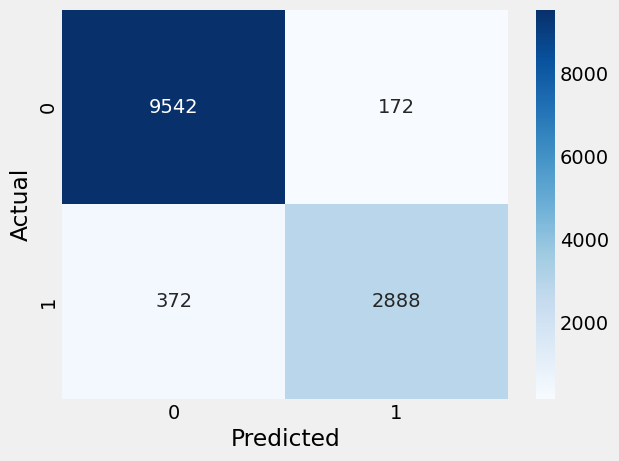

In [68]:
# Get the predicted probabilities from the XGBoost model
ensemble_preds = xgb_model.predict_proba(ensemble_probs)

# Get the predicted labels from the XGBoost probabilities
ensemble_labels = np.argmax(ensemble_preds, axis=1)

# Get the true labels for the test data
true_labels = y_test

# Compute the F1 score, AUC score, and confusion matrix of the ensemble model
f1 = f1_score(true_labels, ensemble_labels)
auc = roc_auc_score(true_labels, ensemble_preds[:, 1])
cm = confusion_matrix(true_labels, ensemble_labels)
ensemble_acc = accuracy_score(true_labels, ensemble_labels)

print('Confusion Matrix:')
print(cm)
print('Test Accuracy:', ensemble_acc)
print('F1 Score:', f1)
print('AUC Score:', auc)

# Generate the classification report
report = classification_report(true_labels, ensemble_labels)
print(report)
# Compute the confusion matrix
cm = confusion_matrix(y_test, ensemble_labels)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('./output/Ensemble_ConfusionMatrix.png')
plt.show()

In [69]:

ensemble = {'Model': 'Proposed Model', 'Accuracy': ensemble_acc, 'F1-score':f1, 'AUC-Score': auc}
models.append(ensemble)


In [70]:
models

[{'Model': 'CNN',
  'Accuracy': 0.9240018725395203,
  'F1-score': 0.8410702772404901,
  'AUC-Score': 0.9670500233045469},
 {'Model': 'Bi-LSTM',
  'Accuracy': 0.9328657388687134,
  'F1-score': 0.8613719560719402,
  'AUC-Score': 0.9741597258273744},
 {'Model': 'GRU',
  'Accuracy': 0.9324803352355957,
  'F1-score': 0.8605539637058262,
  'AUC-Score': 0.9746866201586225},
 {'Model': 'LSTM',
  'Accuracy': 0.9330969452857971,
  'F1-score': 0.8608528374479,
  'AUC-Score': 0.9511748270474212},
 {'Model': 'Proposed Model',
  'Accuracy': 0.9580699861260984,
  'F1-score': 0.9139240506329115,
  'AUC-Score': 0.9931434423278779}]

In [71]:
# models.pop(4)

In [72]:
# models =  models[:4]
# print(models)

model_df = pd.DataFrame(models)
model_df.head()
# model_df.drop(0, inplace=True)
models_comp = model_df.sort_values(by='F1-score', ascending=False)
models_comp.reset_index(drop=True, inplace=True)


In [73]:
models_comp.reset_index(inplace=True)
models_comp

index           Model  Accuracy  F1-score  AUC-Score
0      0  Proposed Model  0.958070  0.913924   0.993143
1      1         Bi-LSTM  0.932866  0.861372   0.974160
2      2            LSTM  0.933097  0.860853   0.951175
3      3             GRU  0.932480  0.860554   0.974687
4      4             CNN  0.924002  0.841070   0.967050

In [74]:
# model2.save('./output/GRU/GRU.h5')
# model3.save('./output/LSTM/LSTM.h5')
# model1.save('./output/BILSTM/Bi-LSTM.h5')
# model.save('./output/CNN.h5')
# model4.save('./output/DNN.h5')
# xgb_model.save_model('./output/Ensemble/Ensemble_xgb.h5')

In [75]:
models_comp.to_csv('Final_comparison.csv')

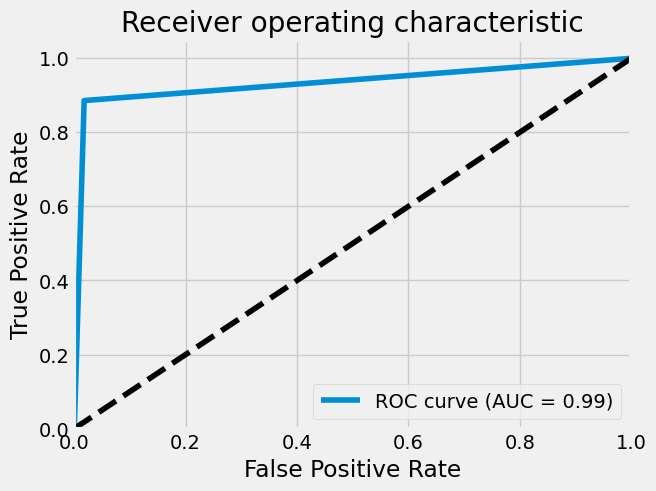

In [76]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, ensemble_labels)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_CURVE.png')
plt.show()

In [77]:
shutil.make_archive('HateSpeechData', 'zip', '/kaggle/working/output')

'/kaggle/working/HateSpeechData.zip'